# Handling Imblance data

In real life we will mostly find imbalance dataset

example- cancer dataset, fraud detection dataset,

In [1]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [2]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [3]:
import glob 
files = glob.glob('c*.csv')
for file in files:
    print(file)

CarPrice_project.csv
company_sales_data (1).csv
company_sales_data (2).csv
company_sales_data.csv
creditcard (1).csv
creditcard.csv


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

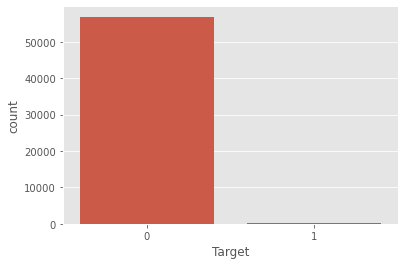

In [7]:
sns.countplot(data.Target)

# Let's understand the trade off between 

 so if you want a high precision the means every time you say a class is positive it is positive and if that is the case this also means you are recalling all the classes so you precision and recall both is when where is the trade of between two This is a very naive or child like case 

In the context of model evaluation in machine learning, precision and recall are two important metrics that are often in tension with each other, and there is indeed a trade-off between them. Let's break down precision and recall and understand the trade-off:

**Precision** is a metric that measures the accuracy of a classifier when it predicts a positive class. It is calculated as:

Precision = True Positives / (True Positives + False Positives)

A high precision means that when the model predicts a positive class, it is likely to be correct. In other words, it minimizes false positives.

**Recall** (also called sensitivity or true positive rate) is a metric that measures the ability of a classifier to identify all relevant instances in the dataset. It is calculated as:

Recall = True Positives / (True Positives + False Negatives)

A high recall means that the model is good at capturing all the positive instances in the dataset and minimizes false negatives.

The trade-off between precision and recall is as follows:

- When you increase the threshold for classifying an instance as positive, you are likely to increase precision but decrease recall. This is because you are becoming more conservative in making positive predictions, reducing the chances of false positives but also missing some true positives.

- Conversely, if you decrease the threshold for classifying an instance as positive, you are likely to increase recall but decrease precision. This means you are becoming more liberal in making positive predictions, capturing more true positives but also increasing the chances of false positives.

Finding the right balance between precision and recall depends on the specific problem you are trying to solve and the associated costs and consequences of false positives and false negatives. In some applications, like medical diagnosis, high recall may be more critical because missing a positive case (false negative) can have severe consequences. In other applications, like spam email detection, high precision may be more important because misclassifying a legitimate email as spam (false positive) is a nuisance.

In practice, you can visualize the trade-off between precision and recall by looking at the precision-recall curve, and you can also use an F1 score, which is the harmonic mean of precision and recall, to balance the two metrics. The choice of the trade-off point depends on the specific needs and constraints of your machine learning problem.

# Let's understand it with an example of elsa test for hiv 

In [11]:
if 0:
    print('deepu')

In [12]:
if 1:
    print('kumar')

kumar


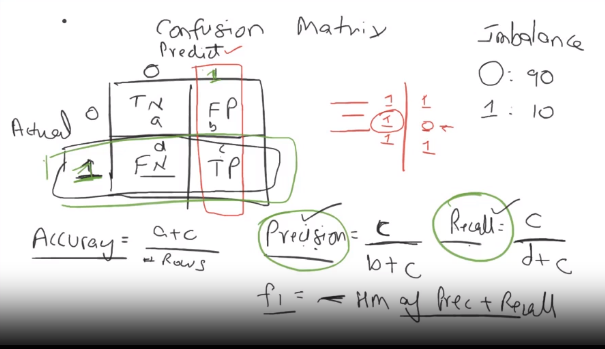

# 0 is negative 

# 1 is positive

Now consider that you have made a machine the detects HIV in body, You would like that if predicted positive for positive people and predicts negative for negative people However you know it's a machine it can make mistake, So what mistake are you willing to afford, well you should be comfortable with the machine predictive positive for negative people they will still live and not die and you can further check and run some other complex test to verify, but you at any cost can not afford the machine saying negative for positve people, i.e so logically what will you do, you will be like okay even if there is a very small chance like fever for 3 months etc I will classify him as positive so now you will have more missclassification but it's okay you will run some more test do a little extra effort but that is desirable case, 

Now lets talk in terms of confusion matrix you wanted that it is okay if a negative person is classified as positive but it is not okay if a positive person is classifed as negative i.e you are basically increasing the recall of the model and now if you are increase the recall the model will classify(say loudly) the negative class(3 month long fever) as positive so what are you doing , you are basically decreasing the precison (how is it decreaseing precesion - precesion is like you are saying positive loudly and how many times you are actually true i.e TP/TP + FP(saying positive for negative class also)

This is what the precision recall trade of is all about if you increase the recall your precision goes down if you increace the precision the recall goes down so you have to choose the threshold at which you have both optimal recall and optimal precions

The precision-recall curve shows you the values of precision and recall at different classification thresholds. By examining this curve, you can choose the threshold that best suits your specific needs and requirements.

Here's the process in more detail:

1. **Precision-Recall Curve**: The precision-recall curve is created by calculating precision and recall at various classification thresholds. It shows how these two metrics change as you adjust the threshold.

2. **Threshold Selection**: You can choose a threshold on the precision-recall curve based on your specific objectives and constraints. The position on the curve corresponds to a specific trade-off between precision and recall. 

    - If you need high precision, you select a threshold that maximizes precision (even if it results in lower recall).

    - If you need high recall, you select a threshold that maximizes recall (even if it results in lower precision).

    - **If you want to balance precision and recall, you may choose a threshold that optimizes the F1 score or another appropriate metric.**

3. **Domain-Specific Decision**: The choice of the threshold should align with the specific goals and consequences of your application. Different applications and domains may prioritize precision, recall, or a balance between the two based on the importance of false positives and false negatives.

The precision-recall curve provides you with a visual representation of how precision and recall change across various threshold values, giving you the flexibility to choose the threshold that best fits your needs. It allows you to make an informed decision about the trade-off between precision and recall that is most suitable for your machine learning model in a particular context.

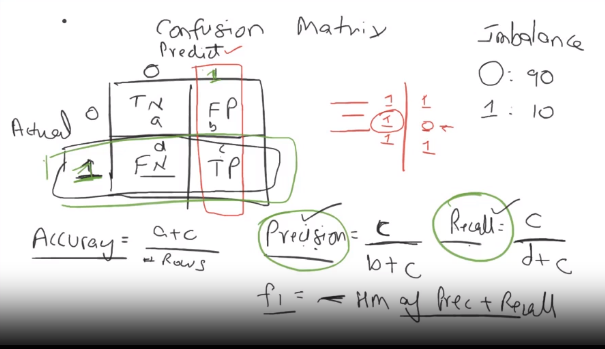

# ROC_AUC -  receiver operator characterstics curve 

It is a plot between True positive rate and flase positive rate 

**True positive rate = TP/TP + FN** 

**False positive rate = FP/FP + TN** i.e was negative but said positive which is FP , was negative and said negative i.e TN

When to use it 

The ROC-AUC curve is a valuable tool for evaluating the performance of a binary classification model. Here are some circumstances where you might find it useful:

- **Binary Classification Problems**: The ROC-AUC curve is specifically designed for binary classification problems¹⁴. It measures the ability of a binary classifier to **distinguish** between classes¹⁴.

- **Various Thresholds**: The ROC curve plots the true positive rate versus the false positive rate at different classification thresholds¹⁴. This allows you to evaluate your model's performance across a range of decision thresholds, not just a single cut-off point¹⁴.

- **Imbalanced Datasets**: The ROC-AUC curve can be particularly useful when dealing with imbalanced datasets³. Unlike accuracy, which can be misleading when classes are imbalanced, AUC takes into account both the positive and negative classes and thus provides a more balanced measure³.

However,**it's important to note that one should use AUC when their dataset does not have a severe imbalance** and when your use case does not require you to use actually predicted probabilities³. 

Remember, no single metric can provide a complete picture of your model's performance. It's always a good idea to look at multiple metrics and consider the specific requirements of your use case when evaluating your model¹⁴.


### When you are using roc_auc you want the True positve rate to be high and false postive rate to be minimum if this is the case you plot will be more close to the left part of the graph which inturn will give you max area under the curve

# PR_AUC - precision recall curve 

It is the a plot between precision and recall

**precesion = TP/TP + FP** how many times shouted positive and it was positive divided by the number of times you shouted positive

**Recall = TP/TP + FN** In a test you studied the entire 5 chapter syllabus and how much you were able to recall divided by the syllabus of the exam i.e how many you studied/ out of 90 positive classes how many were you able ot call those as positive class successfully

**The Precision-Recall curve shows the tradeoff between precision and recall for different thresholds4. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.**

This visualization is especially useful in cases where there is class imbalance or when the cost of false positives and false negatives is different. It helps in determining an optimal threshold for the classifier that balances these two measures depending on the specific requirements of your use case2

There are many technique to handle imbalance data set and there is no math involved in  it every thing is discussed where well in the class notebook so we will focous on pratical part

In [8]:
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [10]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,0.003176,...,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797,0.001720
std,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,1.095156,...,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879,0.041443
min,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,-20.949192,...,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000,0.000000
25%,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,-0.535121,...,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000,0.000000
50%,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,-0.095676,...,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000,0.000000
75%,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,0.453059,...,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000,0.000000
max,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,15.236028,...,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [11]:
# Dependent varialbe 
X = data.iloc[:,:-1]

#independent variable 
Y = data.iloc[:,-1]

In [12]:
X.shape ,Y.shape

((56962, 29), (56962,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [15]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((45569, 29), (45569,), (11393, 29), (11393,))

In [16]:
print(f'The distribution of classes in the trian\n{Y_train.value_counts()}')

The distribution of classes in the trian
0    45492
1       77
Name: Target, dtype: int64


In [17]:
print(f'The distribution of classes in the test\n{Y_test.value_counts()}')

The distribution of classes in the test
0    11372
1       21
Name: Target, dtype: int64


In [18]:
# KNN model 
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [20]:
y_pred_train = model_knn.predict(X_train)

In [21]:
y_pred_test = model_knn.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
print(f'The Knn model accuracy is {accuracy_score(Y_test,y_pred_test)}\nBut this does not paint correct picture')

The Knn model accuracy is 0.9987711752830686
But this does not paint correct picture


In [24]:
confusion_matrix(Y_test,y_pred_test)

array([[11371,     1],
       [   13,     8]], dtype=int64)

# [[TN, FP],
# [FN, TP]]


In [25]:
Y_test.value_counts()

0    11372
1       21
Name: Target, dtype: int64

**True positive rate = TP/TP + FN** 

**False positive rate = FP/FP + TN** i.e was negative but said positive which is FP , was negative and said negative i.e TN

In [26]:
# precesion 
#TP/TP + FP
round(8/(8+1),2)

0.89

In [27]:
# recll
#TP/TP + FN
round(8/(8+13),2)

0.38

In [28]:
# We have a trade of here between precision and recall

## roc_auc score

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_pred_test,Y_test) # note alway put the model_prediction first and then the actual_value

0.9438734676348871

The roc_auc_score of 0.94 tells us that our model is able to diffrentiate the classes very well 

## pr_auc_score

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [45]:
precision, recall, thresholds = precision_recall_curve(y_pred_test,Y_test)
auc_precision_recall = auc(recall, precision)
print(f'The precision_recall_score is {auc_precision_recall}')


The precision_recall_score is 0.6349645215176681


## the curves 

In [42]:
from sklearn import metrics

## ROC curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


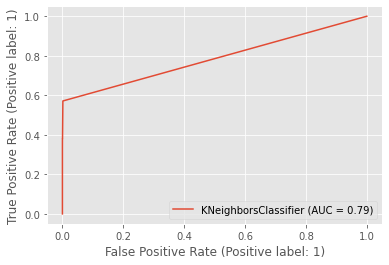

In [48]:
metrics.plot_roc_curve(model_knn,X_test,Y_test)

## precision recall curve 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


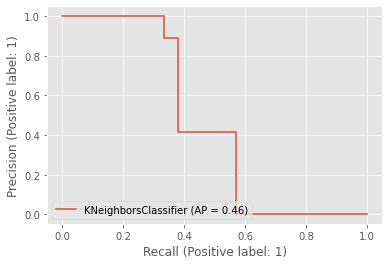

In [49]:
metrics.plot_precision_recall_curve(model_knn,X_test,Y_test)

## understanding the difference between the AUC used in metrics and AUC from roc_auc_score

Noticed how the value of roc_auc_score and the metirics.plot_roc_auc is different.
The main difference between the AUC (Area Under the Curve) value obtained from `roc_auc_score()` and `plot_roc_curve()` is due to the input they use. 

- `roc_auc_score()` uses the actual class labels and the predicted class labels. It doesn't take into account the probabilities associated with each prediction, just whether the prediction was correct or not.

- On the other hand, `plot_roc_curve()` uses the actual class labels and the predicted probabilities for the positive class. **It considers how confident the model was in its predictions, which is reflected in these predicted probabilities.**

So, in essence, `plot_roc_curve()` provides a more comprehensive evaluation of your model's performance as it takes into account both the model's accuracy and its confidence in its predictions.

While both ROC (Receiver Operating Characteristic) curves and Precision-Recall (PR) curves are commonly used to evaluate binary classification models, they have different uses and interpretations.

ROC curves are a popular method for visualizing the performance of binary classifiers. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) of the ROC curve is a single scalar value that summarizes the overall performance of the classifier.

However, ROC curves can present an overly optimistic view of an algorithm's performance if there is a large skew in the class distribution. This is because ROC curves are insensitive to changes in class distribution or imbalanced classes. If the negative class is significantly larger than the positive class, then a small false positive rate can drastically affect the number of false alarms.

On the other hand, Precision-Recall (PR) curves are more informative than ROC curves when dealing with highly imbalanced datasets. Precision-Recall curves do not take True Negatives into account and thus do not get affected by a large number of negative instances. They focus on the minority class (usually the class of interest) and are sensitive to class distribution changes.

So, if you're dealing with an imbalanced dataset or if false positives are a significant concern, PR curves can provide a more instructive indication of your model's performance.

## why use precision recall curve 
See the distribution of tp,fn etc, see the formula the roc is basically a plot between row 1 vs row 2 and row 2 is heavely underpowered hence it does not paint a correct picture of evaluation so this is whay we use the precision recall curve The precision recall curve takes in account the first row 2 column,2 row, first column and 2 row 2nd column which is nothing but precision and recall

pr_curve also gives us the optimal value of threshold where precision and recall are balance (trade off)

**True positive rate = TP/TP + FN** 

**False positive rate = FP/FP + TN** i.e was negative but said positive which is FP , was negative and said negative i.e TN

In [51]:
confusion_matrix(Y_test,y_pred_test)

array([[11371,     1],
       [   13,     8]], dtype=int64)

## let's see what can be done to handle the imblance in the dataset 

# 2. Sampling 

### Under sample

**make the dominant class count equal to submissive class count**

In [52]:
class_count_0 , class_count_1 = data['Target'].value_counts()

In [53]:
class_count_0,class_count_1

(56864, 98)

In [54]:
#let's create a seprate dataset for each class
class_0 = data[data['Target'] == 0]
class_1 = data[data['Target'] == 1]

In [55]:
class_0.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [56]:
class_1.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
1847,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,...,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,99.99,1
2265,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,-4.137840,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00,1
3060,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,...,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1
3418,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,-5.726817,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1
3691,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1


In [57]:
class_0.shape,class_1.shape

((56864, 30), (98, 30))

In [58]:
class_0_under = class_0.sample(class_count_1,replace = False) # it's like df.sample(10) out of entire dataset sample 10 points form it 
class_0_under.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
30202,-0.360445,0.530005,0.760685,-1.376614,0.020709,0.716837,-1.020991,-2.324979,0.291802,-1.595248,...,-1.464934,-0.368931,-0.019378,0.259587,0.870052,-0.726819,0.044556,0.228082,19.99,0
5503,-18.688740,-19.065926,-2.084097,6.486563,10.141222,-7.176130,-3.448963,-0.936437,1.219197,1.662797,...,-3.334915,-0.690227,1.204075,0.427484,1.599814,-0.064764,1.988395,0.476993,7.60,0
28750,-1.769155,-5.877089,-0.570776,0.695980,-2.705451,1.480344,0.671787,0.074654,-0.315737,-0.256850,...,1.044783,-0.284985,-1.305170,-0.178174,-0.360835,-0.366744,-0.207958,0.276840,1552.30,0
24660,1.142134,-1.703133,0.625155,-1.421104,-1.660158,0.469032,-1.459827,0.339991,-1.650126,1.496930,...,0.100564,0.400301,-0.036961,-0.317334,0.069430,-0.069283,0.049410,0.027471,128.80,0
39676,-0.350175,0.896325,0.109224,-1.009776,2.527554,3.416541,0.029449,0.855932,0.763123,-0.621078,...,-0.433000,-1.089604,-0.047157,0.922339,-0.059200,0.047822,0.240946,0.107638,2.28,0


In [59]:
# now that we have class 0 as 98 lets concat the class 0 and 1
test_under=pd.concat([class_1,class_0_under], axis = 0)
test_under.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
1847,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,...,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,99.99,1
2265,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,-4.137840,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00,1
3060,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,...,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1
3418,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,-5.726817,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1
3691,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

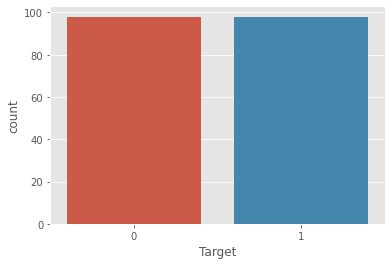

In [60]:
sns.countplot(test_under['Target'])

In [67]:
#you can do it via library also you pass the entire data and it will do undersampling i.e it will reduce dominant class 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42, replacement = True)
x_rus,y_rus = rus.fit_resample(data.iloc[:,:-1],data['Target'])

In [68]:
x_rus.shape,y_rus.shape

((196, 29), (196,))

In [74]:
class_1.Target.value_counts()

1    98
Name: Target, dtype: int64

In [76]:
class_count_0

56864

# oversampling 

In [81]:
class_1_over = class_1.sample(class_count_0,replace = True)

In [89]:
class_0

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0


In [91]:
# let's concat the two 
test_over = pd.concat([class_0,class_1_over],axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

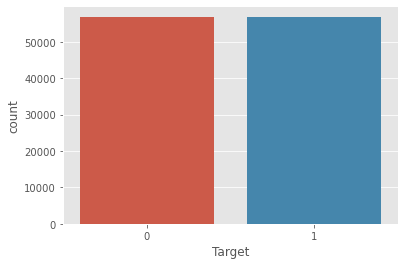

In [92]:
sns.countplot(test_over.Target)

In [93]:
# let's do it from library 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
x_os,y_os = ros.fit_resample(data.iloc[:,:-1],data['Target'])

In [94]:
y_os.value_counts()

0    56864
1    56864
Name: Target, dtype: int64

# 2. Undersampling Tomek Links

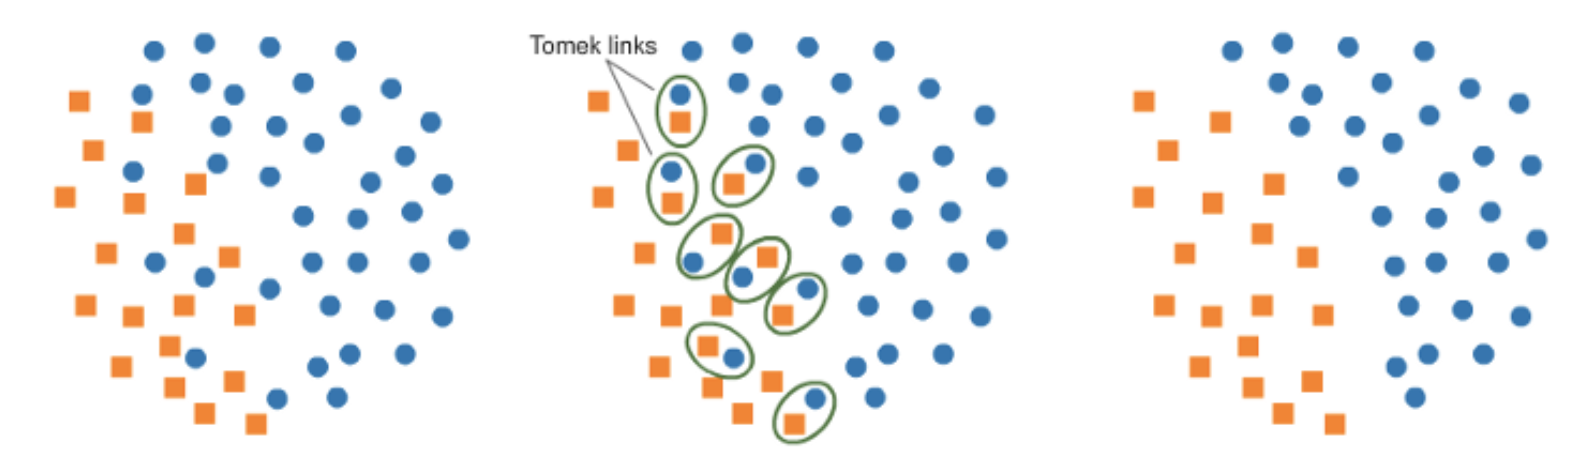

Tomek links are a method in imbalanced binary classification used to remove instances from the majority class that are close to instances in the minority class. The goal is to improve the classification model's performance by reducing the potential overlap between the two classes.

The steps to find and remove instances using Tomek links are as follows:

1. For each instance in the minority class, calculate its distance to the nearest neighbor in the majority class. You can use a distance metric such as Euclidean distance.

2. If the nearest neighbor of a minority class instance is from the majority class, and there is no other minority class instance for which this instance is the nearest neighbor, it forms a Tomek link. In other words, if a minority instance is a nearest neighbor to a majority instance, and this majority instance doesn't have any other minority instance as its nearest neighbor, it's a Tomek link.

3. Remove the instances that form Tomek links. These instances are typically from the majority class.


In [99]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
X_tl,Y_tl = tl.fit_resample(data.iloc[:,:-1],data['Target'])

In [100]:
Y_tl.value_counts()

0    56857
1       98
Name: Target, dtype: int64

In [102]:
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [ ]:
# so the tomek has reduce the size of the dominant class by just 7 counts

# 3. Synthetic Minority Oversampling Technique (SMOTE)
It find the k nearest neighbors of the minority class and places a datapoint (minority class point) somewhere between those two points   

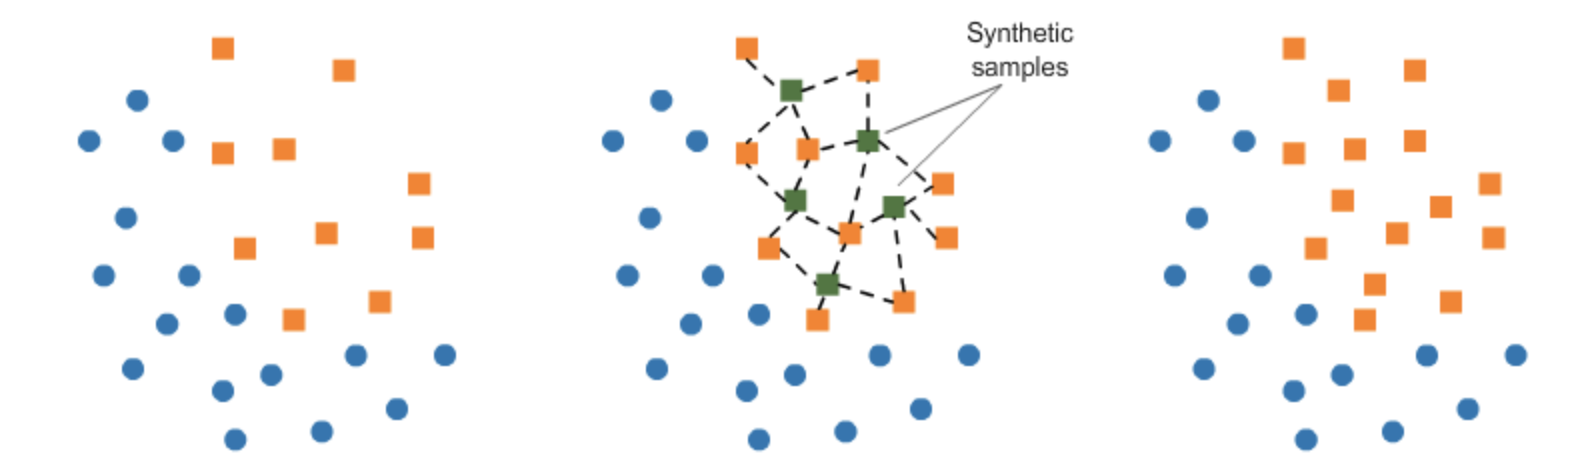

SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote,y_smote = smote.fit_resample(data.iloc[:,:-1],data['Target'])

In [104]:
y_smote.value_counts()

0    56864
1    56864
Name: Target, dtype: int64

In [111]:
print(f'The shape of orginial dataset is {X.shape}')
print(f'The shape of the smote dataset is {y_smote.shape[0],x_smote.shape[1]}')

The shape of orginial dataset is (56962, 29)
The shape of the smote dataset is (113728, 29)
